<a href="https://colab.research.google.com/github/yjoonjang/Deep_Learning/blob/main/text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문장의 유사도를 계산하는 방법


문장의 유사도를 계산하기 위해서는 기본적으로 단어를 숫자, 벡터로 표현해야 합니다. 즉, 유사도 혹은 거리를 수학적으로 계산하기 위해 문장을 일종의 좌표평면 상에 놓을 수 있어야 하고, 문장이 좌표평면에 놓이기 위해서는 문장을 구성하고 있는 단어들을 스칼라 혹은 벡터값으로 변환해줘야 하는 것입니다.

따라서 문장의 유사도를 계산하는 방법은 다음과 같습니다.

1. 단어를 숫자(스칼라 혹은 벡터)로 변환
2. 각 문장을 벡터(단어)의 배열로 변환
3. 문장 벡터간 유사도 계산

# 2. 빈도 기반 유사도 계산

### 2-1. 문장별 단어 카운트

단어를 숫자로 변환하기 위해서는 단어가 몇번 등장하는지 세는 것이 가장 좋습니다. 이를 위해 사용할 패키지들을 불러옵니다.

In [4]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MacOs 한글폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

사용할 3개의 샘플 문장들은 다음과 같습니다.
1. doc_1, doc_2, doc_3 모두 apple 라는 단어 포함합니다.
2. doc_1, doc_2는 과일 apple에 관한 내용입니.
3. doc_3은 apple iPhone에 관한 내용입니다.

In [1]:
doc_1 = "My favorite fruit is red and round apple."
doc_2 = "I like to eat apple pie for dessert. It smells good." # I like to eat apple pie for dessert.
doc_3 = "I love listening to music on my apple iPhone."

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
vectorizer = CountVectorizer(stop_words='english')
docs = [doc_1, doc_2, doc_3]
matrix = vectorizer.fit_transform(docs)

In [6]:
matrix.todense()

matrix([[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]])

In [7]:
vectorizer.get_feature_names()

['apple',
 'dessert',
 'eat',
 'favorite',
 'fruit',
 'good',
 'iphone',
 'like',
 'listening',
 'love',
 'music',
 'pie',
 'red',
 'round',
 'smells']

In [8]:
df_words = pd.DataFrame(
    data=matrix.todense(),
    index=['doc_1', 'doc_2', 'doc_3'],
    columns=vectorizer.get_feature_names()
)

In [9]:
df_words

,apple,dessert,eat,favorite,fruit,good,iphone,like,listening,love,music,pie,red,round,smells
doc_1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0
doc_2,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1
doc_3,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0


### 2-2. 문장 벡터 시각화

In [11]:
doc_dict = {
    'doc_1': doc_1,
    'doc_2': doc_2,
    'doc_3': doc_3,
}

In [12]:
print('doc_1: ',doc_dict['doc_1'])
print('doc_2: ',doc_dict['doc_2'])
print('doc_3: ',doc_dict['doc_3'])

doc_1:  My favorite fruit is red and round apple.
doc_2:  I like to eat apple pie for dessert. It smells good.
doc_3:  I love listening to music on my apple iPhone.


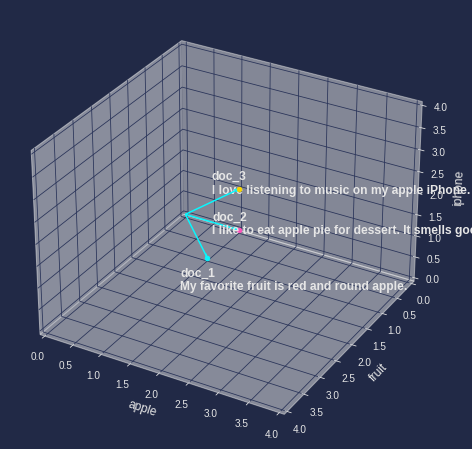

In [14]:
x_label = 'apple'
y_label = 'fruit'
z_label = 'iphone'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words.iterrows():
  x = df_word[x_label]
  y = df_word[y_label]
  z = df_word[z_label]
  vec_len = np.linalg.norm(np.array([x,y,z]))
  ax.quiver(0,0,0,x,y,z,
            arrow_length_ratio=0.1/vec_len)
  if i == 'doc_1':
    ax.text((x-0.5), y, (z-1),
          s=f'{i}\n{doc_dict[i]}',
          size=12,
          fontweight='bold')
  else: 
    ax.text((x-0.5), y, (z-0.3),
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
  ax.scatter(x,y,z)

ax.set_xlim(0,4)
ax.set_ylim(4,0)
ax.set_zlim(0,4)

ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

plt.show()


### 2-3. 문장 벡터간 유사도 계산

1. 유클리디안 거리 계산

In [16]:
dst_1_2 = np.linalg.norm(df_words.loc['doc_1'] - df_words.loc['doc_2'])
dst_2_3 = np.linalg.norm(df_words.loc['doc_2'] - df_words.loc['doc_3'])

print('=' * 20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"distance(doc_1~doc_2) : {round(dst_1_2,2)}")

print('=' * 20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"distance(doc_2~doc_3) : {round(dst_2_3,2)}")

doc_1 : My favorite fruit is red and round apple.
doc_2 : I like to eat apple pie for dessert. It smells good.
distance(doc_1~doc_2) : 3.16
doc_2 : I like to eat apple pie for dessert. It smells good.
doc_3 : I love listening to music on my apple iPhone.
distance(doc_2~doc_3) : 3.16


2. 코사인 거리 계산

코사인 유사도 (cosine similarity) 식은 다음과 같다.
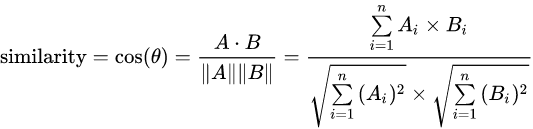

- np.dot(vector_1, vector_2)를 사용해서 스칼라곱을 구한다.
- np.linalg.norm(vetcor_1) * np.linalg.norm(vetcor_2)를 사용해서 각 벡터 길이의 곱을 구한다.
- 최종적으로 아래 식 (get_cos_dist)에서는 **얼마나 유사하지 않은지**에 초점을 둘 것이기 때문에 **(1-(cosine simlilarity))**를 반환한다.

In [17]:
def get_cos_dst(a, b):
  dst = np.dot(a,b)
  dst /= (np.linalg.norm(a) * np.linalg.norm(b))
  dst = 1 - dst
  return dst

In [18]:
cos_dst_1_2 = get_cos_dst(df_words.loc['doc_1'], df_words.loc['doc_2'])
cos_dst_2_3 = get_cos_dst(df_words.loc['doc_2'], df_words.loc['doc_3'])

print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_1_2,2)}")
print(f"cosine distance: {round(cos_dst_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_2_3,2)}")
print(f"cosine distance: {round(cos_dst_2_3,2)}")

doc_1 : My favorite fruit is red and round apple.
doc_2 : I like to eat apple pie for dessert. It smells good.
euclidean distance: 3.16
cosine distance: 0.83
doc_2 : I like to eat apple pie for dessert. It smells good.
doc_3 : I love listening to music on my apple iPhone.
euclidean distance: 3.16
cosine distance: 0.83


### 2-4.결과
- doc_1, doc_2와 doc_2, doc_3 각각의 코사인 거리, 유클리디안 거리가 동일합니다.
- doc_1과 doc_2는 먹는 사과에 관한 문장이고, doc_3은 회사 애플에 관한 문장임에도 불구하고 doc_2이 doc_1, doc_3과의 유사도가 같습니다.
-해당 과정은 문제가 있어 보입니다. 해당 문제를 더욱 극대화시켜 보도록 하겠습니다.



# 3. 코사인 유사도의 효용 (cosine distance vs. euclidean distance)

### 3-1. 단어가 반복 등장하는 예시

In [21]:
doc_1_extend = ' '.join([doc_1] * 5)
doc_1_extend

'My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple.'

문장별 단어 빈도 테이블 생성

In [22]:
docs_with_extend = [doc_1_extend, doc_2, doc_3]
matrix_with_extend = vectorizer.fit_transform(docs_with_extend, matrix)

df_words_with_extend = pd.DataFrame(
    data=matrix_with_extend.todense(), 
    index=['doc_1_extend','doc_2','doc_3'],
    columns=vectorizer.get_feature_names())

df_words_with_extend

,apple,dessert,eat,favorite,fruit,good,iphone,like,listening,love,music,pie,red,round,smells
doc_1_extend,5,0,0,5,5,0,0,0,0,0,0,0,5,5,0
doc_2,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1
doc_3,1,0,0,0,0,0,1,0,1,1,1,0,0,0,0


In [23]:
doc_dict_with_extend = {
    'doc_1_extend':doc_1_extend,
    'doc_2':doc_2,
    'doc_3':doc_3,
}
print('doc_1: ',doc_dict_with_extend['doc_1_extend'])
print('doc_2: ',doc_dict_with_extend['doc_2'])
print('doc_3: ',doc_dict_with_extend['doc_3'])

doc_1:  My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple.
doc_2:  I like to eat apple pie for dessert. It smells good.
doc_3:  I love listening to music on my apple iPhone.


### 3-2. 문장 벡터 시각화

좌표평면상에 3개의 문장을 표시한다.
(doc_1_extend, doc_2, doc_3)

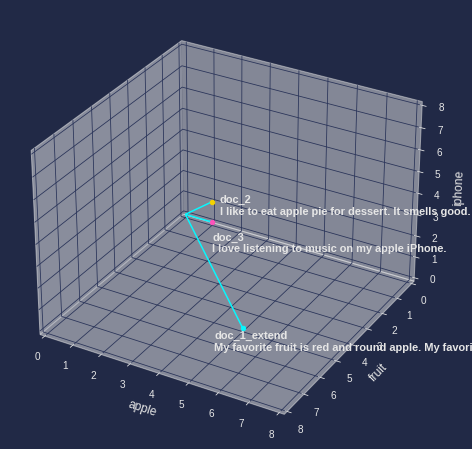

In [32]:
x_label = 'apple'
y_label = 'fruit'
z_label = 'iphone'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, df_word in df_words_with_extend.iterrows():
  x = df_word[x_label]
  y = df_word[y_label]
  z = df_word[z_label]
  vec_len = np.linalg.norm(np.array([x, y, z]))
  ax.quiver(0,0,0,x,y,z,arrow_length_ratio=0.1/vec_len)

  if i == 'doc_1_extend':
    text_loc = ((x-1), y, (z-1.5))
  if i == 'doc_2':
    text_loc = ((x+0.3), y, (z+0.5))
  if i == 'doc_3':
    text_loc = ((x), y, (z-2.5))

  ax.text(*text_loc,
          s=f'{i}\n{doc_dict_with_extend[i]}',
          size=11,
          fontweight='bold'
  )
  ax.scatter(x, y, z)

  ax.set_xlim(0,8)
  ax.set_ylim(8,0)
  ax.set_zlim(0,8)

  ax.set_xlabel(x_label, fontsize=12)
  ax.set_ylabel(y_label, fontsize=12)
  ax.set_zlabel(z_label, fontsize=12)

결과
- doc_1의 벡터 길이가 5배 길어졌습니다.
- doc_1과 doc_2가 이루는 각, doc_2와 doc_3가 이루는 각의 크기가 동일합니다.
- doc_1과 doc_2의 직경 거리가 doc_2와 doc_3의 직경 거리보다 길어졌습니다.

### 3-3. 문장 벡터간 유사도 계산

In [34]:
dst_1_2_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_1_extend'] - df_words_with_extend.loc['doc_2'])
dst_2_3_with_extend = np.linalg.norm(df_words_with_extend.loc['doc_2'] - df_words_with_extend.loc['doc_3'])

cos_dst_1_2_with_extend = get_cos_dst(df_words_with_extend.loc['doc_1_extend'], 
                          df_words_with_extend.loc['doc_2'])
cos_dst_2_3_with_extend = get_cos_dst(df_words_with_extend.loc['doc_2'], 
                          df_words_with_extend.loc['doc_3'])

In [35]:
print('='*20)
print(f"doc_1 : {doc_dict_with_extend['doc_1_extend']}")
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"euclidean distance: {round(dst_1_2_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_1_2_with_extend,2)}")

print('='*20)
print(f"doc_2 : {doc_dict_with_extend['doc_2']}")
print(f"doc_3 : {doc_dict_with_extend['doc_3']}")
print(f"euclidean distance: {round(dst_2_3_with_extend,2)}")
print(f"cosine distance: {round(cos_dst_2_3_with_extend,2)}")

doc_1 : My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple. My favorite fruit is red and round apple.
doc_2 : I like to eat apple pie for dessert. It smells good.
euclidean distance: 11.05
cosine distance: 0.83
doc_2 : I like to eat apple pie for dessert. It smells good.
doc_3 : I love listening to music on my apple iPhone.
euclidean distance: 3.16
cosine distance: 0.83


- doc_1과 doc_2의 유클리디안 거리는 **11.05**, 코사인 거리는 **0.37**
- doc_2와 doc_3의 유클리디안 거리는 **3.16**, 코사인 거리는 0.37

상식적으로, doc_1, doc_2가 같은 의미의 apple을 유사성은 더 커야하지만, 이들의 직경 거리가 더 멀어졌습니다.
반대로, 벡터가 아무리 길어져도 코사인 거리는 동일합니다.

이를 통해 **유클리디안 거리는 문장 크기에 강한 영향을 받으며**, 코사인 거리는 문장 크기로부터 자유로움을 확인했습니다.

# 4. 선형 변환을 통한 의미상 유사도 계산

우리는 위처럼 doc_1, doc_2의 연관성이 doc_2, doc_3의 연관성보다 커야 함을 알고 있습니다. 그렇다면 ‘의미가 유사한 doc_1과 doc_2는 더 가깝게, doc_3은 조금 더 멀리 떨어뜨릴 순 없을까?’에 관해 고민해 보았습니다.

그 결과, 위의 시각화로 나타낸 좌표계를 바꾸는 방법이 있다는 것을 알게 됐습니다. 현재의 좌표평면의 축 (’fruit’, ‘apple’, ‘iphone’)은 빈도 수만 나타내며, 전혀 의미적인 값은 고려하지 않았습니다.
이를 개선시켜 보도록 하겠습니다.

### 4-1. 단어에 의미 부여하는 워드임베딩

선형변환을 하기 위해서는 기저벡터를 먼저 구해야 합니다. 즉, 문장이 위치할 좌표평면상 축을 구성하는 ’fruit’, ‘apple’, ‘iphone’가 각각 어디에 위치하는지, **축의 위치**를 잡는 것입니다.

이를 위해서는 워드임베딩 모델을 사용합니다. 워드임베딩은 위키피디아 같은 방대한 텍스트에서 문장들을 추출하고, 각 문장 내 단어의 위치관계를 학습해 각 단어마다의 의미를 벡터로 정의하는 방식입니다.

In [36]:
from gensim import downloader, corpora, utils

전통적으로 **word2vec** 모델이 많이 쓰이는데, word2vec 모델은 쪼갤 수 있는 최소 단위를 말그대로 '단어'로 합니다. 반면 페이스북에서 이를 더 작은 글자(text) 단위로 학습할 수 있도록 개량한 모델이 **fasttext**입니다.

In [37]:
fasttext = downloader.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


fasttext에서 ‘apple’을 검색하면 다음과 같은 결과를 얻을 수 있습니다.

In [38]:
fasttext.word_vec('apple')

array([-1.3173e-01,  8.2252e-03, -4.9115e-02,  1.9050e-01, -8.0140e-02,
       -4.3704e-02,  5.4014e-02, -1.5770e-01,  1.7366e-02, -6.3682e-02,
       -3.5309e-02, -1.0383e-02,  3.7077e-02,  8.6940e-03,  1.2524e-02,
        8.0532e-03,  3.6221e-02, -7.8963e-02,  5.9926e-02,  7.5806e-02,
       -1.3051e-02,  8.9511e-02, -7.6000e-02,  2.2368e-02, -2.7079e-03,
       -1.1801e-01, -2.1707e-04,  9.1305e-02,  1.9335e-02,  6.4755e-02,
        1.6767e-03, -8.7875e-03,  4.7681e-02,  4.6194e-02,  6.0765e-03,
       -8.1089e-02, -2.2951e-02, -8.4255e-02, -1.1056e-01,  3.6631e-02,
       -9.0706e-02, -5.8909e-02, -1.5277e-01, -1.0573e-01,  6.0893e-02,
        5.5942e-02, -5.0123e-02, -1.0179e-03,  5.0950e-02, -4.3039e-02,
        5.1274e-02,  2.0234e-02, -5.0783e-02, -1.2145e-01, -3.3338e-03,
       -2.3314e-02,  9.1701e-02,  4.1844e-03, -7.1584e-02, -1.1494e-01,
       -5.3832e-02, -4.1383e-02,  1.9317e-01,  1.1936e-01, -7.1862e-02,
       -7.1719e-02, -5.3918e-02,  9.0106e-02, -1.4384e-02, -4.98

In [39]:
fasttext.word_vec('apple').shape

(300,)

fasttext에서 얻어낸 apple은 **300차원**짜리 벡터입니다. 좌표계를 그리기 위해서는 이 큰 차원의 벡터를 최대 3차원으로 바꿔주어야 합니다.

### 4-2. PCA(차원 축소)

다행히 **비지도학습 기반 차원축소 기법**을 사용할 수 있습니다. 차원축소는 다차원 데이터를 더 작은 데이터로 압축하는 방법이며, 데이터가 가지고 있는 본연의 특성을 최대한 유지하면서 변수를 줄일 수 있습니다. 물론, 300차원을 3차원으로 축소하게 되면 그만큼 **정보손실**이 발생합니다. 그러나 우리는 머신러닝 모델링이 아니라 단순히 3차원 좌표계로 문서간 거리를 확인하고자 함이므로 정보손실을 감수하고 차원을 줄이도록 하겠습니다.

차원 축소를 위해서 'apple', 'fruit', 'iphone' 3가지 값을 포함해 관련 단어들을 각 단어당 200개씩 추출해서 데이터를 구성하겠습니다. 이렇게 하는 이유는 'apple', 'fruit', 'iphone' 각 단어의 유사 군집을 함께 비지도학습 시킴으로써 상대적으로 3개 단어의 위치정보를 인지시키기 위해서입니다. 이렇게 했을 때 큰 정보손실에도 고유의 군집 특성을 남길 수 있습니다.

1. 우선, 연관 단어를 모두 추출합니다.

In [40]:
target_words = ['apple','fruit','iphone']
sim_words_1 = [x[0] for x in fasttext.most_similar(target_words[0], topn=200)]
sim_words_2 = [x[0] for x in fasttext.most_similar(target_words[1], topn=200)]
sim_words_3 = [x[0] for x in fasttext.most_similar(target_words[2], topn=200)]


all_words = target_words + sim_words_1 + sim_words_2 + sim_words_3

In [41]:
len(all_words)

603

2. 모든 단어에 대한 300차원의 벡터 값을 불러옵니다.

In [42]:
word_vecs_300d = np.array([fasttext.word_vec(x) for x in all_words])

In [43]:
word_vecs_300d.shape

(603, 300)

3. PCA 모델을 통해 차원을 축소합니다.

- sklearn 패키지에서 제공하는 PCA 모델
- n_componnents 파라미터를 통해 축소할 차원을 3차원으로 설정 후, 결과값을 데이터 프레임으로 생성

In [44]:
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
comps = pca_3d.fit_transform(word_vecs_300d)
df_comps = pd.DataFrame(comps,
                        columns=['comp_1', 'comp_2', 'comp_3'],
                        index=all_words
)

In [45]:
df_comps

,comp_1,comp_2,comp_3
apple,-0.185049,0.569729,-0.076897
fruit,-0.531779,0.208954,0.179814
iphone,0.534580,0.316809,-0.034069
apples,-0.281418,0.329836,0.259692
pear,-0.473928,0.529587,-0.054930
...,...,...,...
celphone,0.129118,-0.146307,-0.119441
Imac,0.354441,0.118560,0.023122
SIM-only,0.228033,-0.166571,-0.027691
webkit,0.266324,-0.025131,-0.142303


In [46]:
df_comps.max()

comp_1    0.819288
comp_2    0.660785
comp_3    0.589784
dtype: float32

In [47]:
df_comps.min()

comp_1   -0.531779
comp_2   -0.280757
comp_3   -0.350645
dtype: float32

In [49]:
 target_words = ['apple','fruit','iphone']
 df_targets = df_comps.loc[target_words]
 df_targets

,comp_1,comp_2,comp_3
apple,-0.185049,0.569729,-0.076897
apple,-0.185050,0.569729,-0.076897
apple,-0.185050,0.569729,-0.076897
fruit,-0.531779,0.208954,0.179814
fruit,-0.531779,0.208953,0.179814
iphone,0.534580,0.316809,-0.034069
iphone,0.534580,0.316809,-0.034069


위 코드에서 문제가 발생했습니다.
위처럼 실행시킨 결과는 3개의 apple, 2개의 fruit, 2개의 iphone을 가져옵니다.

이는 fasttext.most_similar() 함수를 실행할 때 fruit과 iphone은 apple을, apple은 fruit과 iphone을 가져왔기 때문으로 추정됩니다.

이를 위해 아래 코드를 실행하여 중복 항목을 없애줍니다.

In [51]:
df_targets = df_targets.round(5)
df_targets = df_targets.drop_duplicates()

In [52]:
df_targets

,comp_1,comp_2,comp_3
apple,-0.18505,0.56973,-0.07690
fruit,-0.53178,0.20895,0.17981
iphone,0.53458,0.31681,-0.03407


### 4-3. 기저 벡터 및 문장 벡터 시각화

1. 기존 축을 기준으로 기저 벡터 위치 시각화

comp_1   -0.71683
comp_2    0.77868
comp_3    0.10291
Name: doc_1, dtype: float64
comp_1   -0.18505
comp_2    0.56973
comp_3   -0.07690
Name: doc_2, dtype: float64
comp_1    0.34953
comp_2    0.88654
comp_3   -0.11097
Name: doc_3, dtype: float64


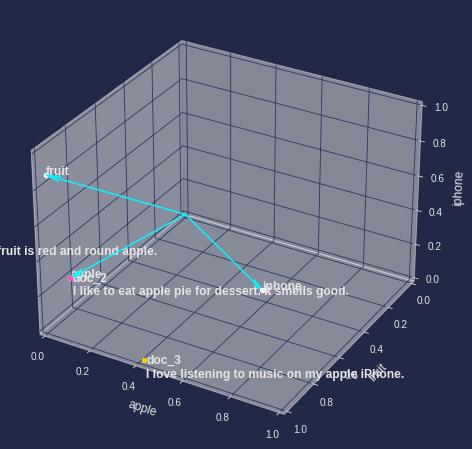

In [56]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for word, word_vec in df_targets.iterrows():
    comp_1 = word_vec[comp_1_label]
    comp_2 = word_vec[comp_2_label]
    comp_3 = word_vec[comp_3_label]
    vec_len = np.linalg.norm(np.array([x,y,z]))
    ax.quiver(0,0,0,comp_1,comp_2,comp_3,
              arrow_length_ratio=0.1/vec_len)
    ax.text(comp_1,comp_2,comp_3, 
            s=word,
            size=12,
            fontweight='bold',
            )
    ax.scatter(comp_1,comp_2,comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
    print(doc_pos.dot(df_targets))
    # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    
    ax.text((x+0.01),y,(z-0.1), 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,1)
ax.set_ylim(1,0)
ax.set_zlim(0,1)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)


plt.show()

2. 변환된 기저 벡터로 문서 벡터 선형 변환

In [57]:
df_targets

,comp_1,comp_2,comp_3
apple,-0.18505,0.56973,-0.07690
fruit,-0.53178,0.20895,0.17981
iphone,0.53458,0.31681,-0.03407


기저 벡터가 기존에 (1,0,0), (0,1,0), (0,0,1)이었다면 지금은 (-0.19, 0.57, -0.08), (-0.53, 0.21, 0.18), (0.53, 0.32, -0.03)로 선형 변환되었음을 확인할 수 있습니다.

선형 변환된 기저 벡터에 따라 문서 벡터 역시 선형 변환시켜야 합니다. 선형 변환은 다음과 같이 행렬곱을 통해 수행할 수 있습니다.

In [58]:
df_words[['apple', 'fruit', 'iphone']].dot(df_targets)

,comp_1,comp_2,comp_3
doc_1,-0.71683,0.77868,0.10291
doc_2,-0.18505,0.56973,-0.07690
doc_3,0.34953,0.88654,-0.11097


3. 선형 변환된 기저 벡터, 문서 벡터 시각화

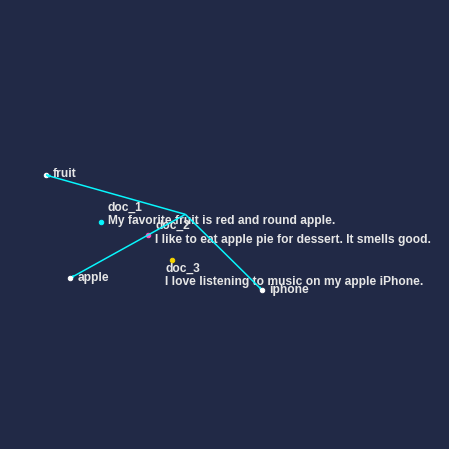

In [59]:
comp_1_label = 'comp_1'
comp_2_label = 'comp_2'
comp_3_label = 'comp_3'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

target_words = ['apple', 'fruit', 'iphone']
df_targets = df_comps.loc[target_words]
df_targets = df_targets.round(5)
df_targets = df_targets.drop_duplicates()

for word, word_vec in df_targets.iterrows():
  comp_1 = word_vec[comp_1_label] * 3
  comp_2 = word_vec[comp_2_label] * 3
  comp_3 = word_vec[comp_3_label] * 3
  vec_len = np.linalg.norm(np.array([x, y, z]))
  ax.quiver(0,0,0,comp_1, comp_2, comp_3, arrow_length_ratio=0.03/vec_len)
  ax.text((comp_1+0.1), comp_2, comp_3, s=word, size=12, fontweight='bold')
  ax.scatter(comp_1, comp_2, comp_3, c='white')

docs_origin_pos = df_words[target_words]
for i, doc_pos in docs_origin_pos.iterrows():
  # 선형 변환
    x, y, z = doc_pos.dot(df_targets)
    if i=='doc_1':
            text_loc = ((x+0.1), y, (z))
    if i=='doc_2':
        text_loc = ((x+0.1), y, (z-0.1))
    if i=='doc_3':
        text_loc = ((x-0.1), y, (z-0.5))
    ax.text(*text_loc, 
            s=f'{i}\n{doc_dict[i]}',
            size=12,
            fontweight='bold')
    
    ax.scatter(x,y,z)
    

ax.set_xlim(0,3)
ax.set_ylim(3,0)
ax.set_zlim(0,3)


ax.set_xlabel(x_label, fontsize=12)
ax.set_ylabel(y_label, fontsize=12)
ax.set_zlabel(z_label, fontsize=12)

ax.axis('off')

plt.show()

In [60]:
docs_origin_pos

,apple,fruit,iphone
doc_1,1,1,0
doc_2,1,0,0
doc_3,1,0,1


### 4-4.문장 벡터간 유사도 계산

마지막으로, 선형 변환시킨 문장 벡터의 코사인 거리가 어떻게 바뀌었는지 확인해보겠습니다.

In [63]:
df_doc_trans_pos = docs_origin_pos.dot(df_targets)

In [64]:
df_doc_trans_pos

,comp_1,comp_2,comp_3
doc_1,-0.71683,0.77868,0.10291
doc_2,-0.18505,0.56973,-0.07690
doc_3,0.34953,0.88654,-0.11097


In [65]:
dst_trans_1_2 = np.linalg.norm(df_doc_trans_pos.loc['doc_1'] - df_doc_trans_pos.loc['doc_2'])
dst_trans_2_3 = np.linalg.norm(df_doc_trans_pos.loc['doc_2'] - df_doc_trans_pos.loc['doc_3'])


cos_dst_trans_1_2 = get_cos_dst(df_doc_trans_pos.loc['doc_1'],
                               df_doc_trans_pos.loc['doc_2'])
cos_dst_trans_2_3 = get_cos_dst(df_doc_trans_pos.loc['doc_2'],
                               df_doc_trans_pos.loc['doc_3'])


print('='*20)
print(f"doc_1 : {doc_dict['doc_1']}")
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"euclidean distance: {round(dst_trans_1_2,2)}")
print(f"cosine distance: {round(cos_dst_trans_1_2,2)}")

print('='*20)
print(f"doc_2 : {doc_dict['doc_2']}")
print(f"doc_3 : {doc_dict['doc_3']}")
print(f"euclidean distance: {round(dst_trans_2_3,2)}")
print(f"cosine distance: {round(cos_dst_trans_2_3,2)}")

doc_1 : My favorite fruit is red and round apple.
doc_2 : I like to eat apple pie for dessert. It smells good.
euclidean distance: 0.6
cosine distance: 0.11
doc_2 : I like to eat apple pie for dessert. It smells good.
doc_3 : I love listening to music on my apple iPhone.
euclidean distance: 0.62
cosine distance: 0.23


최종 결과를 확인해보면, doc_1과 doc_2의 유클리디안 거리는 0.6, 코사인 거리는 0.12 이고, doc_2과 doc_3의 유클리디안 거리는 0.62, 코사인 거리는 0.23 임을 확인할 수 있습니다.

> 이를 통해 doc_1과 doc_2의 유사도가 doc_2와 doc_3의 유사도보다 큼을 알 수 있었습니다.